Standard deviation of phi: 1.6559408673629992
Standard deviation of psi: 1.8027412321015923


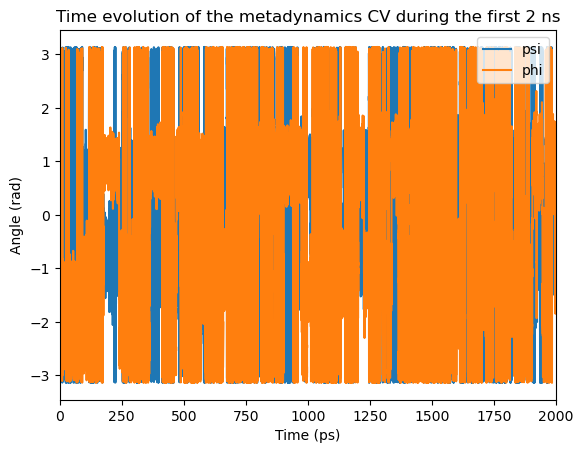

/state/partition1/job-26532567/ipykernel_1334215/665578623.py:35: RuntimeWarning: divide by zero encountered in log
  H=-np.log(H)


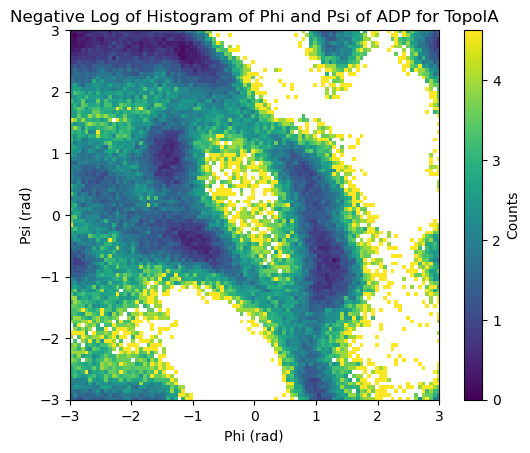

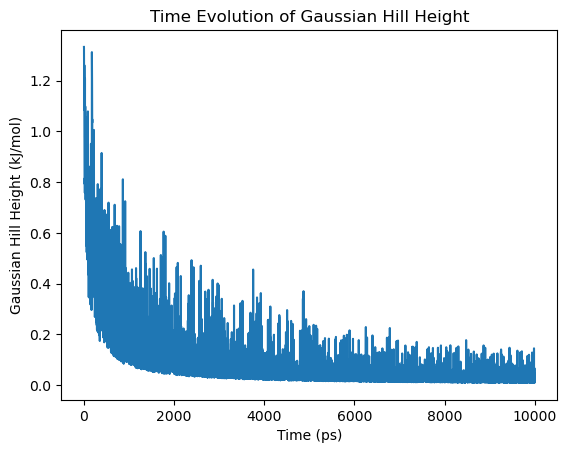

In [12]:
# this notebook is for plotting the end to end analysis and radius of gyration
import numpy as np
import pandas as pd
from pandas import read_csv
from matplotlib.image import NonUniformImage
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

#load mdtraj
import mdtraj as md
import os

# load 2dmetad colvar file
dataA = pd.read_csv('./dialaA_2dmetad_biasfactor10_pace500_height1.2_sigma0.55_1.1_10ns_COLVAR', header=None, delim_whitespace=True,skiprows=5)
A_phi_std = dataA[1].std()
print('Standard deviation of phi:',A_phi_std)
A_psi_std= dataA[2].std()
print('Standard deviation of psi:',A_psi_std)

#plot phi and psi against time
plt.plot(dataA[0][0:100001],dataA[2][0:100001],label="psi")
plt.plot(dataA[0][0:100001],dataA[1][0:100001],label="phi")
plt.legend(loc="upper right")
plt.xlabel('Time (ps)')
plt.ylabel('Angle (rad)')
plt.title('Time evolution of the metadynamics CV during the first 2 ns')
plt.xlim([0,2000])
plt.savefig('Time evolution of the metadynamics CV during the first 2 ns by 2D METAD.pdf',format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

H, xedges, yedges = np.histogram2d(dataA[1][0:100001], dataA[2][0:100001], bins=100, normed=True)
H=H.T
H=-np.log(H)
H=H-H.min()
plt.imshow(H, interpolation='nearest', origin='lower',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.xlabel('Phi (rad)')
plt.ylabel('Psi (rad)')
plt.title('Negative Log of Histogram of Phi and Psi of ADP for TopolA')
plt.xlim([-3,3])
plt.ylim([-3,3])
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')
plt.savefig('Negative Log of Histogram of Phi and Psi of diala by 2D METAD.pdf',format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

# Plot Gaussian Height against time
hill_A = pd.read_csv('./dialaA_2dmetad_biasfactor10_pace500_height1.2_sigma0.55_1.1_10ns_HILLS', header=None, delim_whitespace=True,skiprows=7)
plt.plot(hill_A[0],hill_A[5])
plt.xlabel('Time (ps)')
plt.ylabel('Gaussian Hill Height (kJ/mol)')
plt.title('Time Evolution of Gaussian Hill Height')
plt.savefig('Time Evolution of Gaussian Hill Height for 2D METAD.pdf',format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

[[ -3.14159265  -3.14159265  99.52334541  47.25033356 -11.80610492]
 [ -3.03326187  -3.14159265 104.19177284  38.27873294 -12.97176191]
 [ -2.92493109  -3.14159265 107.82906038  28.21062733 -14.00306168]
 ...
 [  2.81660031   2.92493109  82.65408562  61.77480548  -0.95371652]
 [  2.92493109   2.92493109  89.30550741  60.59149581  -2.13436419]
 [  3.03326187   2.92493109  95.63706921  56.05939929  -3.30153392]]
phi_new: [-3.14159265 -3.03326187 -2.92493109 -2.81660031 -2.70826953 -2.59993875
 -2.49160797 -2.38327718 -2.2749464  -2.16661562 -2.05828484 -1.94995406
 -1.84162328 -1.7332925  -1.62496172 -1.51663094 -1.40830016 -1.29996937
 -1.19163859 -1.08330781 -0.97497703 -0.86664625 -0.75831547 -0.64998469
 -0.54165391 -0.43332312 -0.32499234 -0.21666156 -0.10833078  0.
  0.10833078  0.21666156  0.32499234  0.43332312  0.54165391  0.64998469
  0.75831547  0.86664625  0.97497703  1.08330781  1.19163859  1.29996937
  1.40830016  1.51663094  1.62496172  1.7332925   1.84162328  1.94995406
 

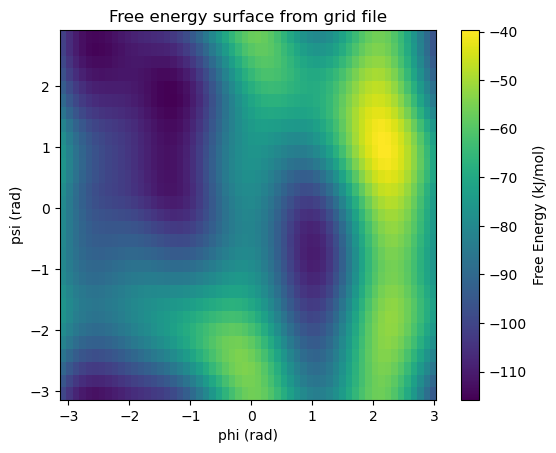

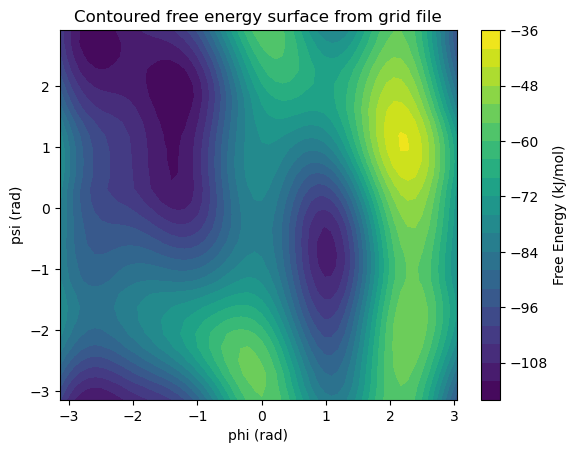

In [13]:
# load grid file
grid_A=np.loadtxt("dialaA_2dmetad_biasfactor10_pace500_height1.2_sigma0.55_1.1_10ns.grid.dat",skiprows=9)
print(grid_A)

# organize column for phi
phi=grid_A[:,0]
phi_new=phi[:58]
print('phi_new:',phi_new)
print('shape of phi_new:',phi_new.shape)
print(phi_new[-1])

# organize column for psi
psi=grid_A[:,1]
psi_new=psi[::58]
print('psi_new:',psi_new)
print('shape of psi_new:',psi_new.shape)

# reshape energy column
fe=grid_A[:,2]
fe_new=fe.reshape(29,58)
print('shape of fe_new:',fe_new.shape)

plt.imshow(-1*fe_new,origin='lower',extent=[phi_new[0],phi_new[-1],psi_new[0],psi_new[-1]])
plt.xlabel('phi (rad)')
plt.ylabel('psi (rad)')
plt.title('Free energy surface from grid file')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Free Energy (kJ/mol)')
plt.savefig('Free energy surface from 2D METAD grid file.pdf',format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

plt.contourf(phi_new,psi_new,-1*fe_new,20)
plt.xlabel('phi (rad)')
plt.ylabel('psi (rad)')
plt.title('Contoured free energy surface from grid file')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Free Energy (kJ/mol)')
plt.savefig('Contoured free energy surface from 2D METAD grid file.pdf',format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

phi_new: [-3.14159265 -2.96705973 -2.7925268  -2.61799388 -2.44346095 -2.26892803
 -2.0943951  -1.91986218 -1.74532925 -1.57079633 -1.3962634  -1.22173048
 -1.04719755 -0.87266463 -0.6981317  -0.52359878 -0.34906585 -0.17453293
  0.          0.17453293  0.34906585  0.52359878  0.6981317   0.87266463
  1.04719755  1.22173048  1.3962634   1.57079633  1.74532925  1.91986218
  2.0943951   2.26892803  2.44346095  2.61799388  2.7925268   2.96705973]
shape pf phi_new: (36,)
2.967059728
psi_new: [-3.14159265 -2.7925268  -2.44346095 -2.0943951  -1.74532925 -1.3962634
 -1.04719755 -0.6981317  -0.34906585  0.          0.34906585  0.6981317
  1.04719755  1.3962634   1.74532925  2.0943951   2.44346095  2.7925268 ]
shape pf psi_new: (18,)
shape pf fe_new: (18, 36)


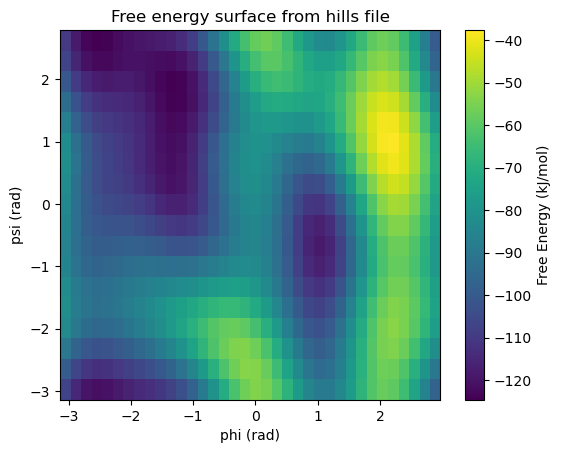

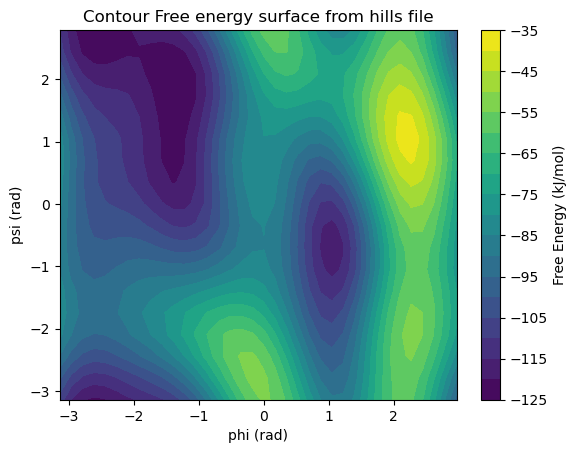

In [14]:
fes=np.loadtxt("fes.dat",skiprows=9)

phi=fes[:,0]
phi_new=phi[:36]
print('phi_new:',phi_new)
print('shape pf phi_new:',phi_new.shape)
print(phi_new[-1])


psi=fes[:,1]
psi_new=psi[::36]
print('psi_new:',psi_new)
print('shape pf psi_new:',psi_new.shape)

fe=fes[:,2]
fe_new=fe.reshape(18,36)
print('shape pf fe_new:',fe_new.shape)

plt.imshow(fe_new,origin='lower',extent=[phi_new[0],phi_new[-1],psi_new[0],psi_new[-1]])
plt.xlabel('phi (rad)')
plt.ylabel('psi (rad)')
plt.title('Free energy surface from hills file')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Free Energy (kJ/mol)')
plt.savefig('Free energy surface from 2D METAD hills file.pdf',format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

plt.contourf(phi_new,psi_new,fe_new,20)
plt.xlabel('phi (rad)')
plt.ylabel('psi (rad)')
plt.title('Contour Free energy surface from hills file')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Free Energy (kJ/mol)')
plt.savefig('Contoured free energy surface from 2D METAD hills file.pdf',format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

phi_new: [-3.14159265 -2.96705973 -2.7925268  -2.61799388 -2.44346095 -2.26892803
 -2.0943951  -1.91986218 -1.74532925 -1.57079633 -1.3962634  -1.22173048
 -1.04719755 -0.87266463 -0.6981317  -0.52359878 -0.34906585 -0.17453293
  0.          0.17453293  0.34906585  0.52359878  0.6981317   0.87266463
  1.04719755  1.22173048  1.3962634   1.57079633  1.74532925  1.91986218
  2.0943951   2.26892803  2.44346095  2.61799388  2.7925268   2.96705973]
shape pf phi_new: (36,)
psi_new: [-3.14159265 -2.7925268  -2.44346095 -2.0943951  -1.74532925 -1.3962634
 -1.04719755 -0.6981317  -0.34906585  0.          0.34906585  0.6981317
  1.04719755  1.3962634   1.74532925  2.0943951   2.44346095  2.7925268 ]
shape pf psi_new: (18,)


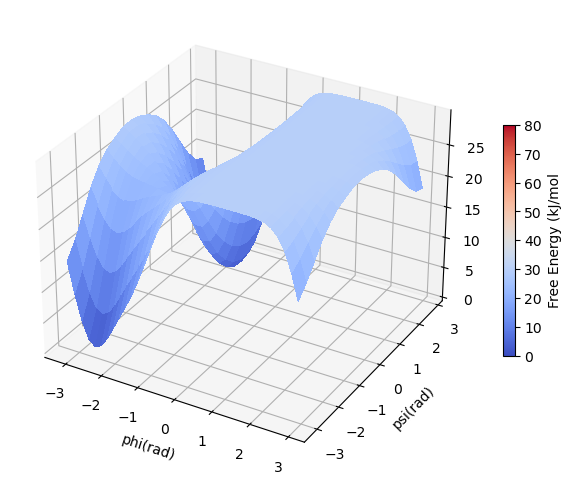

MovieWriter imagemagick unavailable; using Pillow instead.


In [15]:
fps = 5 # frame per sec
frn = 101 # frame number of the animation

def data(frame_number,z,surf):
    fes=np.loadtxt("fes_{}.dat".format(frame_number),skiprows=9)
    fe=fes[:,2]
    z=fe.reshape(18,36)
    ax.clear()
    surf=ax.plot_surface(x,y,z,cmap=cm.coolwarm,vmin = 0, vmax = 80,linewidth=0, antialiased=False)
    ax.set(xlabel='phi(rad)')
    ax.set(ylabel='psi(rad)')
    ax.set(title='Time evolution of diala 2dmetad free energy surface')
    return surf,

# Attaching 3D axis to the figure
fig=plt.figure(figsize=[8, 6])
ax=fig.add_subplot(projection='3d')

# set x and y coordinates
fes=np.loadtxt("fes_0.dat",skiprows=9)

phi=fes[:,0]
phi_new=phi[:36]
print('phi_new:',phi_new)
print('shape pf phi_new:',phi_new.shape)
x=phi_new

psi=fes[:,1]
psi_new=psi[::36]
print('psi_new:',psi_new)
print('shape pf psi_new:',psi_new.shape)
y=psi_new

x,y=np.meshgrid(x,y)

# define z
fe=fes[:,2]
z=fe.reshape(18,36)

surf=ax.plot_surface(x,y,z,cmap=cm.coolwarm,vmin = 0, vmax = 80,linewidth=0, antialiased=False)
ax.set(xlabel='phi(rad)')
ax.set(ylabel='psi(rad)')

ani = animation.FuncAnimation(fig, data,frn,fargs=(z,surf),interval=1000/fps)
fig.colorbar(surf, shrink=0.5, aspect=20,label='Free Energy (kJ/mol')
plt.show()

fn = 'diala_2dmetad_free_energy_surface_animation'
ani.save(fn+'.mp4',writer='ffmpeg',fps=fps)
ani.save(fn+'.gif',writer='imagemagick',fps=fps)



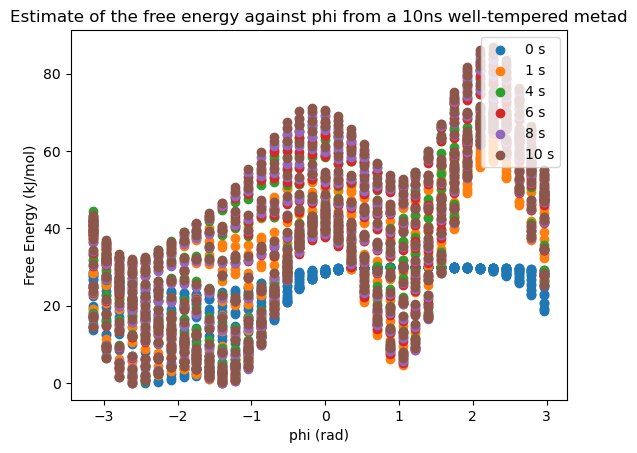

In [80]:
fes0=np.loadtxt("fes_0.dat",skiprows=9)
fes10=np.loadtxt("fes_10.dat",skiprows=9)
fes40=np.loadtxt("fes_40.dat",skiprows=9)
fes60=np.loadtxt("fes_60.dat",skiprows=9)
fes80=np.loadtxt("fes_80.dat",skiprows=9)
fes100=np.loadtxt("fes_100.dat",skiprows=9)
plt.scatter(fes0[:,0],fes0[:,2],label="0 s")
plt.scatter(fes10[:,0],fes10[:,2],label="1 s")
plt.scatter(fes40[:,0],fes40[:,2],label="4 s")
plt.scatter(fes60[:,0],fes60[:,2],label="6 s")
plt.scatter(fes80[:,0],fes80[:,2],label="8 s")
plt.scatter(fes100[:,0],fes100[:,2],label="10 s")
plt.legend(loc="upper right")
plt.xlabel('phi (rad)')
plt.ylabel('Free Energy (kJ/mol)')
plt.title('Estimate of the free energy against phi from a 10ns well-tempered metad')
plt.show()